In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
train = pd.read_csv('train_1.csv')
test = pd.read_csv('test_1.csv')

In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

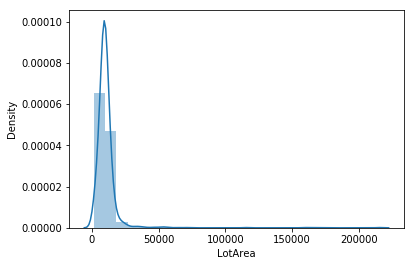

In [17]:
sns.distplot(train['LotArea'], kde=True, bins=25)

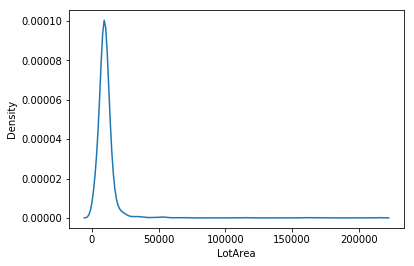

In [18]:
sns.kdeplot(train['LotArea'])

In [ ]:
#sns.pairplot(train)

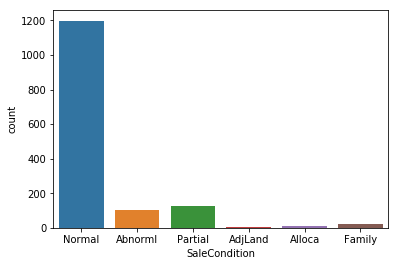

In [22]:
sns.countplot(x='SaleCondition', data=train)

In [30]:
sum(train['LotArea'].isnull())

0

In [31]:
sum(train['SalePrice'].isnull())

0

In [32]:
sum(test['LotArea'].isnull())

0

In [27]:
X_train = train[['LotArea']]
y_train = train[['SalePrice']]

In [49]:
X_test = test[['LotArea']]

# Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression 

In [51]:
lr = LinearRegression()

In [52]:
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred = lr.predict(X_test)
y_pred

array([[183242.02591962],
       [188796.45173189],
       [187878.76398899],
       ...,
       [200835.59093103],
       [180761.95904466],
       [179052.58187597]])

In [55]:
y_pred = y_pred[:,0]

In [64]:
house = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred})

In [65]:
house.to_csv('output.csv', index=False)